In [1]:
from src.dataset import CIFARDataset, iid_dataloader, non_iid_dataloader, filter_dataset_by_class
from src.prepare import prepare
from src.lenet import LeNet, weights_init
from src.train import federated_learning_experiment, train_client, prepare_tensor_for_plotting
from src.utils import plot_class_distribution
from torchvision import datasets, transforms
from torch.autograd import grad
import os
import numpy as np
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

import random

In [2]:
#Setting random seeds
random.seed(41)
np.random.seed(41)
torch.manual_seed(41)

### Baseline: Train LeNet on CIFAR-5 dataset and compute model utility metrics

In [3]:
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_baseline, val_accuracy_baseline, mse_baseline, psnr_baseline, ssim_baseline = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = False,
                            alpha = None
                            )

Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [08:00<00:00, 19.22s/it]
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Experiment: Train LeNet FedAVG on CIFAR-5 with PLGP for various alpha values and compute model utility metrics

In [4]:
#alpha = 0, threshold = 5%
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_0_0_0, val_accuracy_0_0_0, mse_baseline_0_0_0, psnr_baseline_0_0_0, ssim_baseline_0_0_0 = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = True,
                            alpha = 0.0
                            )

#alpha = 0.05, threshold = 5%
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_0_0_5, val_accuracy_0_0_5, mse_baseline_0_0_5, psnr_baseline_0_0_5, ssim_baseline_0_0_5 = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = True,
                            alpha = 0.05
                            )

#alpha = 0.10, threshold = 5%
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_0_1_0, val_accuracy_0_1_0, mse_baseline_0_1_0, psnr_baseline_0_1_0, ssim_baseline_0_1_0 = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = True,
                            alpha = 0.10
                            )

#alpha = 0.15, threshold = 5%
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_0_1_5, val_accuracy_0_1_5, mse_baseline_0_1_5, psnr_baseline_0_1_5, ssim_baseline_0_1_5 = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = True,
                            alpha = 0.15
                            )

#alpha = 0.20, threshold = 5%
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_0_2_0, val_accuracy_0_2_0, mse_baseline_0_2_0, psnr_baseline_0_2_0, ssim_baseline_0_2_0 = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = True,
                            alpha = 0.20
                            )

#alpha = 0.25, threshold = 5%
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
train_accuracy_0_2_5, val_accuracy_0_2_5, mse_baseline_0_2_5, psnr_baseline_0_2_5, ssim_baseline_0_2_5 = federated_learning_experiment(
                            global_model,
                            num_clients_per_round=2,
                            num_local_epochs=10,
                            lr = 5e-3,
                            client_train_loader=iid_client_train_loader,
                            max_rounds=10,
                            device=device,
                            criterion=criterion,
                            test_dataloader=validation_loader,
                            train_dataloader= train_loader,
                            filtered_train_dataset=clients_dataset,
                            prune = True,
                            alpha = 0.25
                            )

Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [07:52<00:00, 18.89s/it]


Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [08:44<00:00, 20.99s/it]


Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [09:06<00:00, 21.85s/it]


Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [09:07<00:00, 21.88s/it]


Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [07:03<00:00, 16.94s/it]


Files already downloaded and verified
Files already downloaded and verified


Reconstructing training images using iDLG: 100%|██████████| 25/25 [08:24<00:00, 20.18s/it]
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10((data_range ** 2) / err)
Reconstructing training images using iDLG: 100%|██████████| 25/25 [09:07<00:00, 21.88s/it]


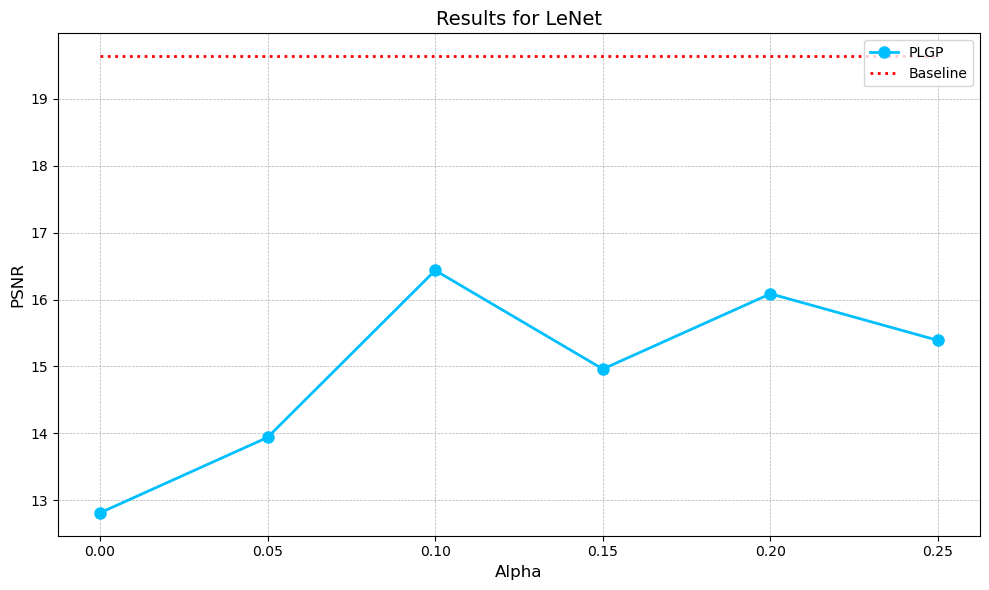

In [5]:
#Plot 1)

alphas = np.arange(0, 0.30, 0.05)
psnr_vals = [psnr_baseline_0_0_0[0], psnr_baseline_0_0_5[0], psnr_baseline_0_1_0[0], psnr_baseline_0_1_5[0], psnr_baseline_0_2_0[0], psnr_baseline_0_2_5[0]]

plt.figure(figsize=(10, 6))
plt.plot(alphas, psnr_vals, 'o-', label="PLGP", linewidth=2, markersize=8, color='deepskyblue')  # Enhanced line and marker
plt.hlines(y=psnr_baseline[0], xmin=0.00, xmax=0.25, colors='red', linestyles='dotted', label="Baseline", linewidth=2)

plt.xlabel("Alpha", fontsize=12)
plt.ylabel("PSNR", fontsize=12)
plt.title("Results for LeNet", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()



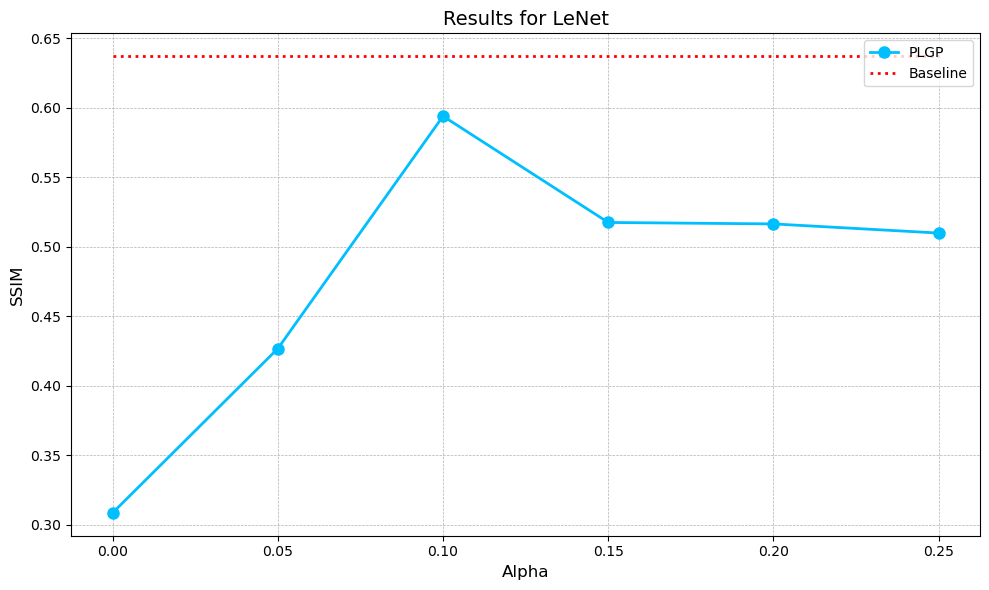

In [6]:
#Plot 2)

alphas = np.arange(0, 0.30, 0.05)
ssim_vals = [ssim_baseline_0_0_0[0], ssim_baseline_0_0_5[0], ssim_baseline_0_1_0[0], ssim_baseline_0_1_5[0], ssim_baseline_0_2_0[0], ssim_baseline_0_2_5[0]]

plt.figure(figsize=(10, 6))
plt.plot(alphas, ssim_vals, 'o-', label="PLGP", linewidth=2, markersize=8, color='deepskyblue')  # Enhanced line and marker
plt.hlines(y=ssim_baseline[0], xmin=0.00, xmax=0.25, colors='red', linestyles='dotted', label="Baseline", linewidth=2)

plt.xlabel("Alpha", fontsize=12)
plt.ylabel("SSIM", fontsize=12)
plt.title("Results for LeNet", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



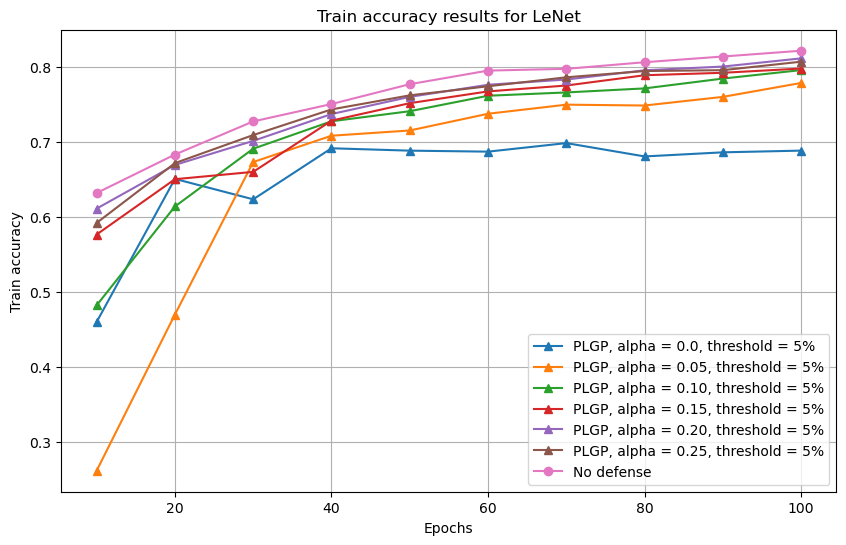

In [60]:
#Plot 3)

epochs = np.arange(10, 110, 10)

plt.figure(figsize=(10, 6))

# Plotting for each specified value
plt.plot(epochs, train_accuracy_0_0_0, '^-', label='PLGP, alpha = 0.0, threshold = 5%')
plt.plot(epochs, train_accuracy_0_0_5, '^-', label='PLGP, alpha = 0.05, threshold = 5%')
plt.plot(epochs, train_accuracy_0_1_0, '^-', label='PLGP, alpha = 0.10, threshold = 5%')
plt.plot(epochs, train_accuracy_0_1_5, '^-', label='PLGP, alpha = 0.15, threshold = 5%')
plt.plot(epochs, train_accuracy_0_2_0, '^-', label='PLGP, alpha = 0.20, threshold = 5%')
plt.plot(epochs, train_accuracy_0_2_5, '^-', label='PLGP, alpha = 0.25, threshold = 5%')

# Assuming psnr_vals_baseline is still to be plotted
plt.plot(epochs, train_accuracy_baseline, 'o-', label = 'No defense')

plt.xlabel('Epochs')
plt.ylabel('Train accuracy')
plt.title("Train accuracy results for LeNet")
plt.legend()
plt.grid(True)
plt.show()

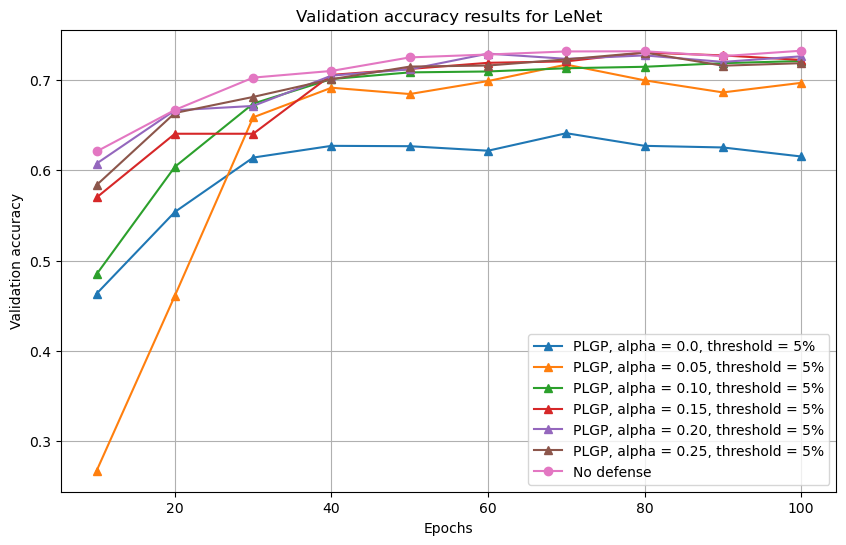

In [75]:
#Plot 4)

epochs = np.arange(10, 110, 10)

plt.figure(figsize=(10, 6))

# Plotting for each specified value
plt.plot(epochs, val_accuracy_0_0_0, '^-', label='PLGP, alpha = 0.0, threshold = 5%')
plt.plot(epochs, val_accuracy_0_0_5, '^-', label='PLGP, alpha = 0.05, threshold = 5%')
plt.plot(epochs, val_accuracy_0_1_0, '^-', label='PLGP, alpha = 0.10, threshold = 5%')
plt.plot(epochs, val_accuracy_0_1_5, '^-', label='PLGP, alpha = 0.15, threshold = 5%')
plt.plot(epochs, val_accuracy_0_2_0, '^-', label='PLGP, alpha = 0.20, threshold = 5%')
plt.plot(epochs, val_accuracy_0_2_5, '^-', label='PLGP, alpha = 0.25, threshold = 5%')

# Assuming psnr_vals_baseline is still to be plotted
plt.plot(epochs, val_accuracy_baseline, 'o-', label = 'No defense')

plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.title("Validation accuracy results for LeNet")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
print(f"Validation accuracy obtained using alpha = 0 is: {val_accuracy_0_0_0[-1]*100} %")
print(f"Validation accuracy obtained using alpha = 0.05 is: {val_accuracy_0_0_5[-1]*100} %")
print(f"Validation accuracy obtained using alpha = 0.10 is: {val_accuracy_0_1_0[-1]*100} %")
print(f"Validation accuracy obtained using alpha = 0.15 is: {val_accuracy_0_1_5[-1]*100} %")
print(f"Validation accuracy obtained using alpha = 0.20 is: {val_accuracy_0_2_0[-1]*100} %")
print(f"Validation accuracy obtained using alpha = 0.25 is: {val_accuracy_0_2_5[-1]*100} %")


Validation accuracy obtained using alpha = 0 is: 61.540000000000006 %
Validation accuracy obtained using alpha = 0.05 is: 69.69999999999999 %
Validation accuracy obtained using alpha = 0.10 is: 72.11999999999999 %
Validation accuracy obtained using alpha = 0.15 is: 72.24000000000001 %
Validation accuracy obtained using alpha = 0.20 is: 72.64 %
Validation accuracy obtained using alpha = 0.25 is: 71.88 %


In [77]:
print(f"Training accuracy obtained using alpha = 0 is: {train_accuracy_0_0_0[-1]*100} %")
print(f"Training accuracy obtained using alpha = 0.05 is: {train_accuracy_0_0_5[-1]*100} %")
print(f"Training accuracy obtained using alpha = 0.10 is: {train_accuracy_0_1_0[-1]*100} %")
print(f"Training accuracy obtained using alpha = 0.15 is: {train_accuracy_0_1_5[-1]*100} %")
print(f"Training accuracy obtained using alpha = 0.20 is: {train_accuracy_0_2_0[-1]*100} %")
print(f"Training accuracy obtained using alpha = 0.25 is: {train_accuracy_0_2_5[-1]*100} %")


Training accuracy obtained using alpha = 0 is: 68.884 %
Training accuracy obtained using alpha = 0.05 is: 77.91600000000001 %
Training accuracy obtained using alpha = 0.10 is: 79.632 %
Training accuracy obtained using alpha = 0.15 is: 79.84 %
Training accuracy obtained using alpha = 0.20 is: 81.196 %
Training accuracy obtained using alpha = 0.25 is: 80.752 %


In [78]:
print(f"Average PSNR for 25 image reconstruction w/o pruning is: {psnr_baseline[0]}")
print(f"Average PSNR for 25 image reconstruction with alpha = 0 is: {psnr_baseline_0_0_0[0]}")
print(f"Average PSNR for 25 image reconstruction with alpha = 0.05 is: {psnr_baseline_0_0_5[0]}")
print(f"Average PSNR for 25 image reconstruction with alpha = 0.10 is: {psnr_baseline_0_1_0[0]}")
print(f"Average PSNR for 25 image reconstruction with alpha = 0.15 is: {psnr_baseline_0_1_5[0]}")
print(f"Average PSNR for 25 image reconstruction with alpha = 0.20 is: {psnr_baseline_0_2_0[0]}")
print(f"Average PSNR for 25 image reconstruction with alpha = 0.25 is: {psnr_baseline_0_2_5[0]}")

Average PSNR for 25 image reconstruction w/o pruning is: 19.63553802659861
Average PSNR for 25 image reconstruction with alpha = 0 is: 12.812067406362887
Average PSNR for 25 image reconstruction with alpha = 0.05 is: 13.940055317815494
Average PSNR for 25 image reconstruction with alpha = 0.10 is: 16.435018588739183
Average PSNR for 25 image reconstruction with alpha = 0.15 is: 14.961298402301622
Average PSNR for 25 image reconstruction with alpha = 0.20 is: 16.085660457156898
Average PSNR for 25 image reconstruction with alpha = 0.25 is: 15.388820690869014


In [79]:
print(f"Average SSIM for 25 image reconstruction w/o pruning is: {ssim_baseline[0]}")
print(f"Average SSIM for 25 image reconstruction with alpha = 0 is: {ssim_baseline_0_0_0[0]}")
print(f"Average SSIM for 25 image reconstruction with alpha = 0.05 is: {ssim_baseline_0_0_5[0]}")
print(f"Average SSIM for 25 image reconstruction with alpha = 0.10 is: {ssim_baseline_0_1_0[0]}")
print(f"Average SSIM for 25 image reconstruction with alpha = 0.15 is: {ssim_baseline_0_1_5[0]}")
print(f"Average SSIM for 25 image reconstruction with alpha = 0.20 is: {ssim_baseline_0_2_0[0]}")
print(f"Average SSIM for 25 image reconstruction with alpha = 0.25 is: {ssim_baseline_0_2_5[0]}")

Average SSIM for 25 image reconstruction w/o pruning is: 0.6372306044283322
Average SSIM for 25 image reconstruction with alpha = 0 is: 0.3085601895779837
Average SSIM for 25 image reconstruction with alpha = 0.05 is: 0.42678810421610247
Average SSIM for 25 image reconstruction with alpha = 0.10 is: 0.5940592837560689
Average SSIM for 25 image reconstruction with alpha = 0.15 is: 0.5175575662415941
Average SSIM for 25 image reconstruction with alpha = 0.20 is: 0.5165173190785572
Average SSIM for 25 image reconstruction with alpha = 0.25 is: 0.5099369878787183
